# Linear Regression Practical Implementation

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
dataset = fetch_california_housing()

In [5]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
print(dataset.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [8]:
print(dataset.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [9]:
print(dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [10]:
print(dataset.target_names)

['MedHouseVal']


In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(dataset.data, columns= dataset.feature_names)

In [8]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
df['Price'] = dataset.target

In [23]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
df.shape

(20640, 9)

In [21]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [24]:
df.isnull().sum()  #To check for null values

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [12]:
import seaborn as sns

In [13]:
df_copy = df[0:1000]

In [14]:
df_copy.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [15]:
df_copy.shape

(1000, 9)

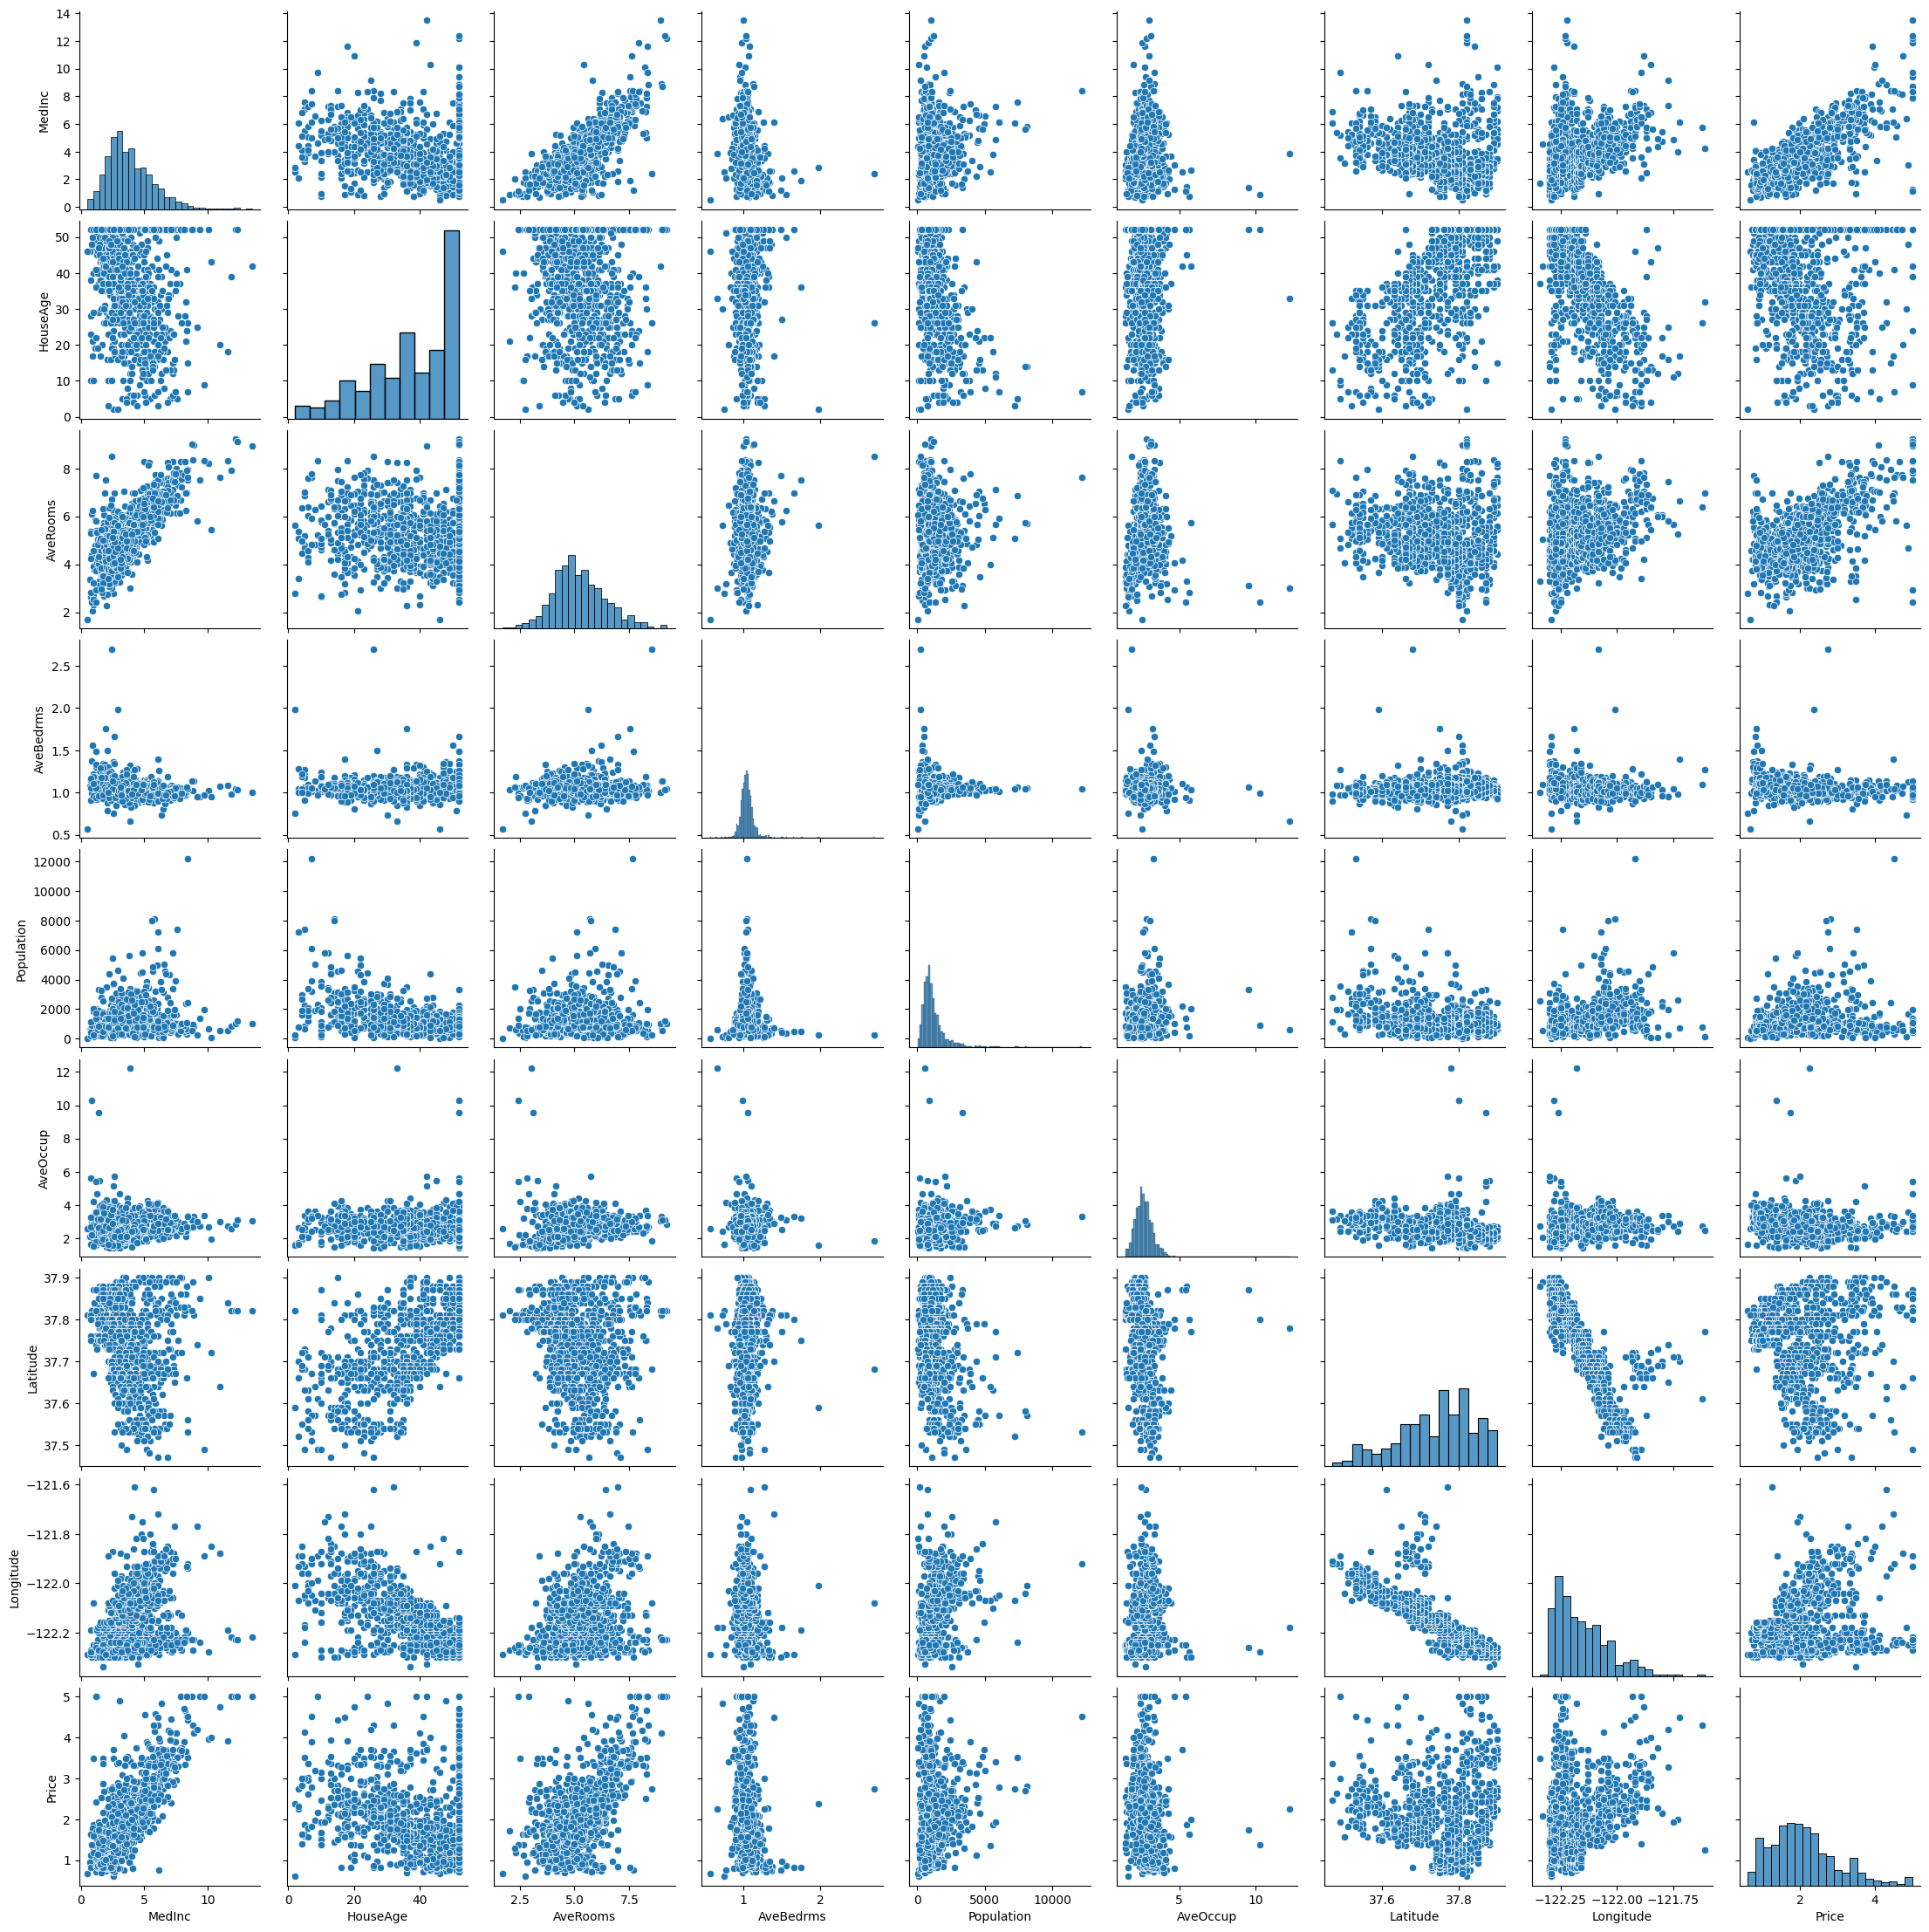

In [29]:
sns.pairplot(df_copy)

In [16]:
#step1: Divide the dataset into dependent and independent

In [17]:
# Price is dependent feature and rest is independent.

In [68]:
x = df.iloc[:,:-1]   # independent features
y = df.iloc[:,-1]    # dependednt feature

In [69]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [70]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [71]:
#Step2: Divide the dataset into trian and test .

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size=0.33, random_state=42)

In [73]:
# test_size = 0.33 means testting 33 data if total data is 100 and remaining 67 will got training data.

In [74]:
# random state can be any value. It is just used fro shuffling the data

In [75]:
x_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5088,0.9809,19.0,3.187726,1.129964,726.0,2.620939,33.98,-118.28
17096,4.2232,33.0,6.189696,1.086651,1015.0,2.377049,37.46,-122.23
5617,3.5488,42.0,4.821577,1.095436,1044.0,4.331950,33.79,-118.26
20060,1.6469,24.0,4.274194,1.048387,1686.0,4.532258,35.87,-119.26
895,3.9909,14.0,4.608303,1.089350,2738.0,2.471119,37.54,-121.96


In [76]:
x.shape

(20640, 8)

In [77]:
x_train.shape, x_test.shape

((13828, 8), (6812, 8))

In [78]:
# x = x train + x test

In [79]:
# Step3: Feature Scalng- Standardization

In [80]:
# Refer notebook for theory part

In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [82]:
scaler.fit(x_train)

StandardScaler()

In [83]:
scaler.fit_transform(x_train)

array([[-1.52169954, -0.75868455, -0.91813082, ..., -0.04014979,
        -0.78315293,  0.65090402],
       [ 0.18205382,  0.3523991 ,  0.30748451, ..., -0.05943619,
         0.8475975 , -1.31911678],
       [-0.17232772,  1.06666717, -0.25107784, ...,  0.09515433,
        -0.87218816,  0.66087881],
       ...,
       [-0.49518065,  0.59048846, -0.59192622, ...,  0.01608523,
        -0.75972261,  0.60103008],
       [ 0.96816708, -1.07613702,  0.39144665, ...,  0.0039722 ,
         0.90383028, -1.18445713],
       [-0.68377427,  1.86029835, -0.83041358, ..., -0.08065717,
         0.9928655 , -1.41387727]])

In [84]:
x_train = scaler.fit_transform(x_train)

In [85]:
x_train

array([[-1.52169954, -0.75868455, -0.91813082, ..., -0.04014979,
        -0.78315293,  0.65090402],
       [ 0.18205382,  0.3523991 ,  0.30748451, ..., -0.05943619,
         0.8475975 , -1.31911678],
       [-0.17232772,  1.06666717, -0.25107784, ...,  0.09515433,
        -0.87218816,  0.66087881],
       ...,
       [-0.49518065,  0.59048846, -0.59192622, ...,  0.01608523,
        -0.75972261,  0.60103008],
       [ 0.96816708, -1.07613702,  0.39144665, ...,  0.0039722 ,
         0.90383028, -1.18445713],
       [-0.68377427,  1.86029835, -0.83041358, ..., -0.08065717,
         0.9928655 , -1.41387727]])

In [86]:
x_test = scaler.transform(x_test)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
regression=LinearRegression()

In [89]:
regression.fit(x_train,y_train)

LinearRegression()

In [90]:
regression.coef_

array([ 8.46603472e-01,  1.20333548e-01, -2.98800785e-01,  3.47243173e-01,
       -8.81413334e-05, -4.17242067e-02, -8.94420371e-01, -8.70401317e-01])

In [91]:
regression.intercept_

2.0666362048018536

In [92]:
# Prediction

In [93]:
y_pred=regression.predict(x_test)

In [94]:
y_pred

array([0.72563462, 1.76650223, 2.70545812, ..., 1.25803135, 1.66673014,
       2.25826279])

In [95]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [96]:
import numpy as np
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

0.5369686543372459
0.5295710106684453
0.7327814505957735


In [97]:
# Accuracy r2 and adjusted r square
from sklearn.metrics import r2_score

In [98]:
score=r2_score(y_test,y_pred)

In [99]:
score

0.5970494128783952

In [101]:
#display adjusted R-square
1 - (1-score)*(len(y)-1)/(len(y)-x.shape[1]-1)

0.5968931623477872

In [102]:
# Adjusted r square is less than r2.

In [104]:
# Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [105]:
y_pred=ridge.predict(x_test)

In [106]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

0.5369457054801822
0.5295668709657081
0.7327657916962159


In [107]:
# Lasso
from sklearn.linear_model import Lasso

In [108]:
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [109]:
y_pred=lasso.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

1.3326257277946882
0.9126511897647483
1.15439409553007


In [110]:
# error is more in lasso

In [111]:
# ElasticNet
from sklearn.linear_model import ElasticNet

In [112]:
elasticnet=ElasticNet()
elasticnet.fit(x_train,y_train)

ElasticNet()

In [114]:
y_pred=elasticnet.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

1.061031401183927
0.8119183692654035
1.0300637850074756
